<a href="https://colab.research.google.com/github/fabiooshiro/DBFFile/blob/master/dcgan/DC-GAN-Celeb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Useful Libraries

In [58]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
%matplotlib inline

In [59]:
import tensorflow
print (tensorflow.__version__)

2.8.0


# Download and Unzip dataset

In [1]:
from google.colab import drive
!wget https://s3.amazonaws.com/calindra.tests/johnfoot/players.zip
drive.mount('/content/gdrive')
!unzip ./players.zip -d /content/

--2022-02-16 12:24:24--  https://s3.amazonaws.com/calindra.tests/johnfoot/players.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 54.231.40.138
Connecting to s3.amazonaws.com (s3.amazonaws.com)|54.231.40.138|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 485384352 (463M) [application/zip]
Saving to: ‘players.zip’

players.zip         100%[===================>] 462.90M  46.9MB/s    in 11s     

2022-02-16 12:24:35 (43.3 MB/s) - ‘players.zip’ saved [485384352/485384352]

Mounted at /content/gdrive


In [8]:
!rm /content/__MACOSX/players/._players-256-268.png
!ls -la /content/players/

Streaming output truncated to the last 5000 lines.
-rw-r--r-- 1 root root  60128 Feb 15 14:35 players-246-920.png
-rw-r--r-- 1 root root  56408 Feb 15 09:24 players-246-923.png
-rw-r--r-- 1 root root  59520 Feb 15 14:35 players-246-928.png
-rw-r--r-- 1 root root  58302 Feb 15 10:56 players-246-929.png
-rw-r--r-- 1 root root  52727 Feb 15 14:35 players-246-930.png
-rw-r--r-- 1 root root  67528 Feb 15 14:35 players-246-931.png
-rw-r--r-- 1 root root  55507 Feb 15 14:35 players-246-936.png
-rw-r--r-- 1 root root  54752 Feb 15 10:56 players-246-937.png
-rw-r--r-- 1 root root  54435 Feb 15 14:35 players-246-946.png
-rw-r--r-- 1 root root  59094 Feb 15 14:35 players-246-947.png
-rw-r--r-- 1 root root  48071 Feb 15 14:35 players-246-950.png
-rw-r--r-- 1 root root  58751 Feb 15 14:35 players-246-951.png
-rw-r--r-- 1 root root  51949 Feb 15 14:34 players-246-954.png
-rw-r--r-- 1 root root  54538 Feb 15 14:34 players-246-955.png
-rw-r--r-- 1 root root  69014 Feb 15 14:34 players-246-956.png
-rw-

In [60]:
import glob
files = glob.glob('/content/players/*.png')
len(files)

8585

In [61]:
for file in files[:10]:
    anime_img = cv2.imread(file)
    print (anime_img.shape)

(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)
(240, 240, 3)


# Display samples

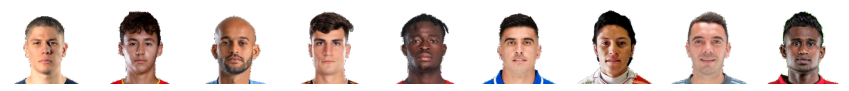

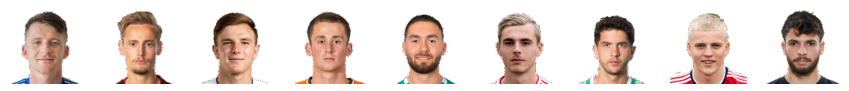

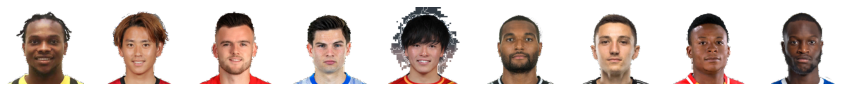

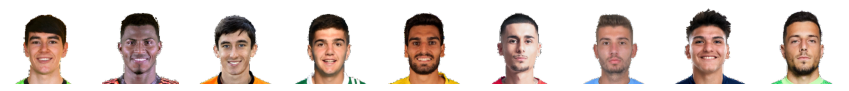

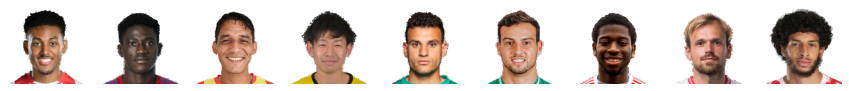

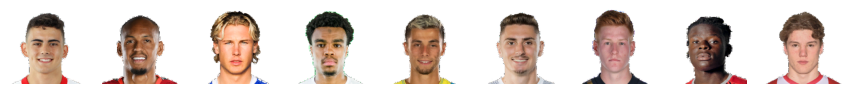

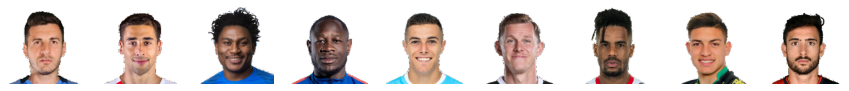

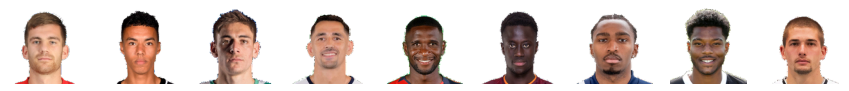

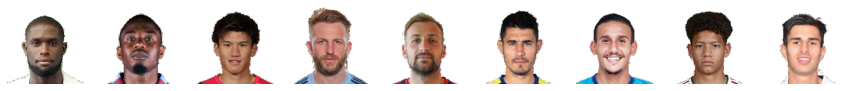

In [62]:
for k in range(9):
    plt.figure(figsize=(15, 15))
    for j in range(9):
        f = np.random.choice(files)
        celeb_img = cv2.imread(f, cv2.IMREAD_UNCHANGED)
        trans_mask = celeb_img[:,:,3] == 0
        celeb_img[trans_mask] = [255, 255, 255, 255]
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        
        plt.subplot(990 + 1 + j)
        plt.imshow(celeb_img)
        plt.axis('off')
        #plt.title(trainY[i])
    plt.show()

# Data Preparation and Normalization

In [64]:
from tqdm import tqdm_notebook

images = []
for file in tqdm_notebook(files):
    celeb_img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
    trans_mask = celeb_img[:,:,3] == 0
    celeb_img[trans_mask] = [255, 255, 255, 255]
    celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
    celeb_img = cv2.resize(celeb_img, (100, 100))
    images.append((celeb_img-127.5)/127.5)

images = np.array(images)
print (images.shape)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


  0%|          | 0/8585 [00:00<?, ?it/s]

(8585, 100, 100, 3)


# Define Generator Model

In [65]:
random_input = tensorflow.keras.layers.Input(shape = 100)

x = tensorflow.keras.layers.Dense(64 * 7 * 7)(random_input)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Reshape((7, 7, 64))(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), strides=(2,2), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2DTranspose(filters=128, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.Activation('relu')(x)

x = tensorflow.keras.layers.Conv2D(filters=3, kernel_size=(3,3), padding='same')(x)
generated_image = tensorflow.keras.layers.Activation('tanh')(x)

generator_network = tensorflow.keras.models.Model(inputs=random_input, outputs=generated_image)
generator_network.summary()

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_4 (Dense)             (None, 3136)              316736    
                                                                 
 activation_14 (Activation)  (None, 3136)              0         
                                                                 
 batch_normalization_18 (Bat  (None, 3136)             12544     
 chNormalization)                                                
                                                                 
 reshape_2 (Reshape)         (None, 7, 7, 64)          0         
                                                                 
 conv2d_transpose_8 (Conv2DT  (None, 14, 14, 128)      204928    
 ranspose)                                                 

# Define Discriminator

In [66]:
image_input = tensorflow.keras.layers.Input(shape=(56, 56, 3))

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(image_input)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5), strides=2, padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='same')(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=128, kernel_size=(5,5))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Conv2D(filters=64, kernel_size=(3,3))(x)
x = tensorflow.keras.layers.LeakyReLU(alpha=0.2)(x)
x = tensorflow.keras.layers.BatchNormalization(momentum=0.8)(x)

x = tensorflow.keras.layers.Flatten()(x)

x = tensorflow.keras.layers.Dense(1)(x)
real_vs_fake_output = tensorflow.keras.layers.Activation('sigmoid')(x)

discriminator_network = tensorflow.keras.models.Model(inputs=image_input, outputs=real_vs_fake_output)
discriminator_network.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 56, 56, 3)]       0         
                                                                 
 conv2d_15 (Conv2D)          (None, 28, 28, 128)       9728      
                                                                 
 leaky_re_lu_12 (LeakyReLU)  (None, 28, 28, 128)       0         
                                                                 
 conv2d_16 (Conv2D)          (None, 14, 14, 64)        204864    
                                                                 
 leaky_re_lu_13 (LeakyReLU)  (None, 14, 14, 64)        0         
                                                                 
 batch_normalization_22 (Bat  (None, 14, 14, 64)       256       
 chNormalization)                                                
                                                           

In [67]:
adam_optimizer = tensorflow.keras.optimizers.Adam(learning_rate=0.0002, beta_1=0.5)
discriminator_network.compile(loss='binary_crossentropy', optimizer=adam_optimizer, metrics=['accuracy'])

# Define combined model: DCGAN

In [68]:
discriminator_network.trainable=False

g_output = generator_network(random_input)
d_output = discriminator_network(g_output)

dcgan_model = tensorflow.keras.models.Model(random_input, d_output)
dcgan_model.summary()

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 100)]             0         
                                                                 
 model_6 (Functional)        (None, 56, 56, 3)         1768387   
                                                                 
 model_7 (Functional)        (None, 1)                 904961    
                                                                 
Total params: 2,673,348
Trainable params: 1,761,347
Non-trainable params: 912,001
_________________________________________________________________


# Compiling Models

In [69]:
dcgan_model.compile(loss='binary_crossentropy', optimizer=adam_optimizer)

# Define Data Generators

In [70]:
def get_random_noise(batch_size, noise_size):
    random_values = np.random.randn(batch_size*noise_size)
    random_noise_batch = np.reshape(random_values, (batch_size, noise_size))
    return random_noise_batch

def get_fake_samples(generator_network, batch_size, noise_size):
    random_noise_batch = get_random_noise(batch_size, noise_size) 
    fake_samples = generator_network.predict_on_batch(random_noise_batch)
    return fake_samples

def get_real_samples(batch_size):
    random_files = np.random.choice(files, size=batch_size)
    images = []
    for file in random_files:
        celeb_img = cv2.imread(file, cv2.IMREAD_UNCHANGED)
        trans_mask = celeb_img[:,:,3] == 0
        celeb_img[trans_mask] = [255, 255, 255, 255]
        celeb_img = cv2.cvtColor(celeb_img, cv2.COLOR_BGR2RGB)
        celeb_img = cv2.resize(celeb_img, (56, 56))
        images.append((celeb_img-127.5)/127.5)
    real_images = np.array(images)
    return real_images

def show_generator_results(generator_network):
    for k in range(9):
        plt.figure(figsize=(11, 11))
        fake_samples = get_fake_samples(generator_network, 9, noise_size)
        fake_samples = (fake_samples+1.0)/2.0
        for j in range(9):
            plt.subplot(990 + 1 + j)
            plt.imshow(fake_samples[j])
            plt.axis('off')
            #plt.title(trainY[i])
        plt.show()
    return

# Training DCGAN on Celeb Faces

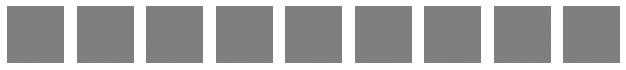

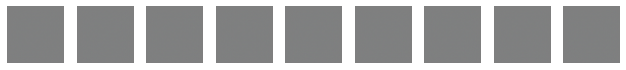

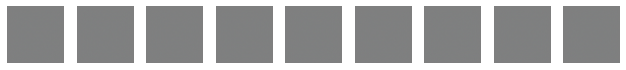

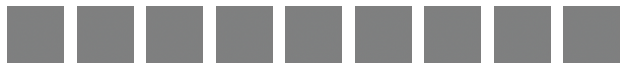

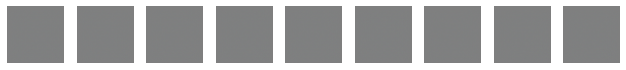

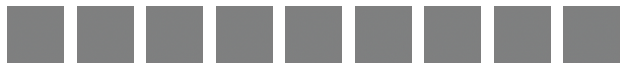

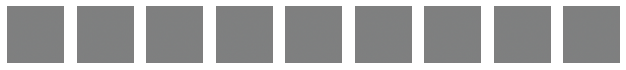

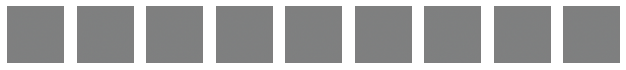

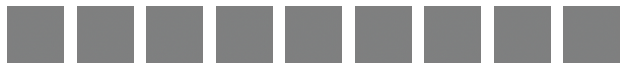

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_0/assets
Epoch:0, Step:0, D-Loss:0.384, D-Acc:87.000, G-Loss:0.708
Epoch:0, Step:50, D-Loss:0.001, D-Acc:100.000, G-Loss:15.881
Epoch:0, Step:100, D-Loss:0.002, D-Acc:100.000, G-Loss:7.746
Epoch:0, Step:150, D-Loss:0.053, D-Acc:98.000, G-Loss:2.094
Epoch:0, Step:200, D-Loss:0.215, D-Acc:90.000, G-Loss:5.406
Epoch:0, Step:250, D-Loss:0.185, D-Acc:93.000, G-Loss:3.326
Epoch:0, Step:300, D-Loss:0.179, D-Acc:94.000, G-Loss:5.673
Epoch:0, Step:350, D-Loss:0.129, D-Acc:96.000, G-Loss:8.429
Epoch:0, Step:400, D-Loss:0.200, D-Acc:91.000, G-Loss:4.112
Epoch:0, Step:450, D-Loss:0.203, D-Acc:94.000, G-Loss:1.230
Epoch:1, Step:0, D-Loss:0.242, D-Acc:92.000, G-Loss:2.594
Epoch:1, Step:50, D-Loss:0.242, D-Acc:90.000, G-Loss:6.338
Epoch:1, Step:100, D-Loss:0.254, D-Acc:89.000, G-Loss:4.261
Epoch:1, Step:150, D-Loss:0.213, D-Acc:91.000, G-Loss:2.180
Epoch:1, Step:200, D-Loss:0.206, D-Acc:93.000, G-Loss:7.425
Epoch:1, S

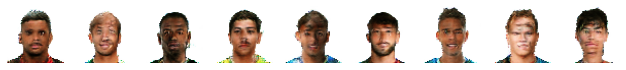

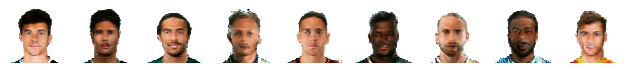

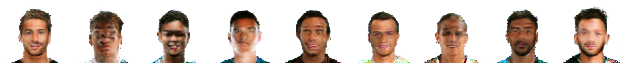

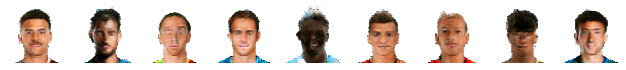

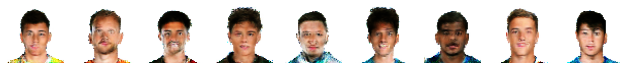

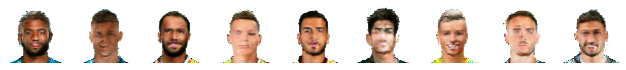

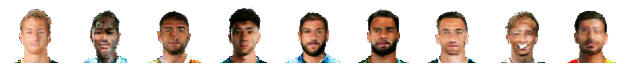

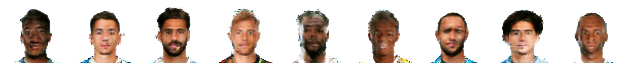

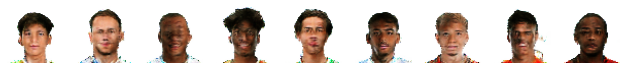

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_5/assets
Epoch:5, Step:0, D-Loss:0.370, D-Acc:84.000, G-Loss:3.191
Epoch:5, Step:50, D-Loss:0.240, D-Acc:90.000, G-Loss:4.708
Epoch:5, Step:100, D-Loss:0.450, D-Acc:80.000, G-Loss:1.487
Epoch:5, Step:150, D-Loss:0.444, D-Acc:75.000, G-Loss:3.081
Epoch:5, Step:200, D-Loss:0.280, D-Acc:89.000, G-Loss:3.938
Epoch:5, Step:250, D-Loss:0.249, D-Acc:91.000, G-Loss:1.296
Epoch:5, Step:300, D-Loss:0.471, D-Acc:77.000, G-Loss:2.773
Epoch:5, Step:350, D-Loss:0.350, D-Acc:88.000, G-Loss:0.726
Epoch:5, Step:400, D-Loss:0.459, D-Acc:75.000, G-Loss:2.314
Epoch:5, Step:450, D-Loss:0.472, D-Acc:80.000, G-Loss:0.889
Epoch:6, Step:0, D-Loss:0.338, D-Acc:86.000, G-Loss:3.462
Epoch:6, Step:50, D-Loss:0.625, D-Acc:73.000, G-Loss:5.565
Epoch:6, Step:100, D-Loss:0.363, D-Acc:82.000, G-Loss:2.696
Epoch:6, Step:150, D-Loss:0.441, D-Acc:78.000, G-Loss:2.380
Epoch:6, Step:200, D-Loss:0.643, D-Acc:63.000, G-Loss:2.825
Epoch:6, Step

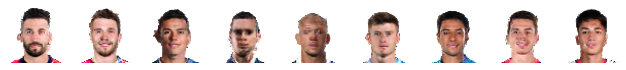

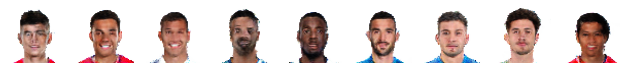

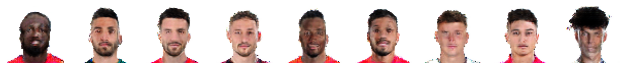

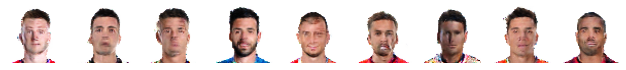

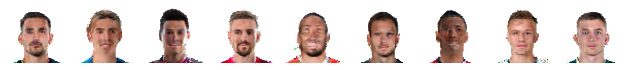

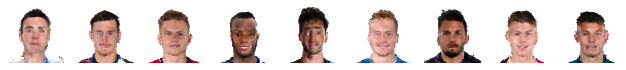

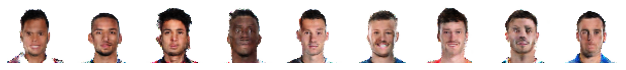

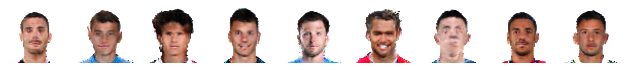

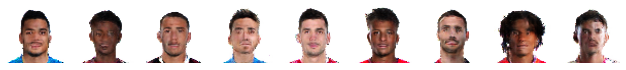

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_10/assets
Epoch:10, Step:0, D-Loss:0.639, D-Acc:62.000, G-Loss:1.309
Epoch:10, Step:50, D-Loss:0.327, D-Acc:85.000, G-Loss:1.720
Epoch:10, Step:100, D-Loss:0.412, D-Acc:85.000, G-Loss:0.719
Epoch:10, Step:150, D-Loss:0.593, D-Acc:67.000, G-Loss:2.273
Epoch:10, Step:200, D-Loss:0.573, D-Acc:68.000, G-Loss:0.380
Epoch:10, Step:250, D-Loss:0.452, D-Acc:79.000, G-Loss:0.810
Epoch:10, Step:300, D-Loss:0.497, D-Acc:75.000, G-Loss:0.946
Epoch:10, Step:350, D-Loss:0.474, D-Acc:82.000, G-Loss:0.279
Epoch:10, Step:400, D-Loss:0.567, D-Acc:74.000, G-Loss:1.245
Epoch:10, Step:450, D-Loss:0.515, D-Acc:74.000, G-Loss:0.595
Epoch:11, Step:0, D-Loss:0.490, D-Acc:70.000, G-Loss:0.559
Epoch:11, Step:50, D-Loss:0.672, D-Acc:59.000, G-Loss:1.126
Epoch:11, Step:100, D-Loss:0.552, D-Acc:74.000, G-Loss:2.449
Epoch:11, Step:150, D-Loss:0.297, D-Acc:91.000, G-Loss:1.463
Epoch:11, Step:200, D-Loss:0.284, D-Acc:90.000, G-Loss:2.1

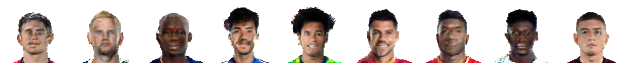

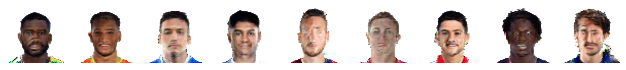

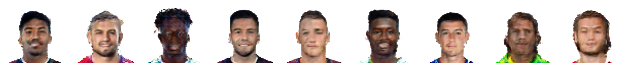

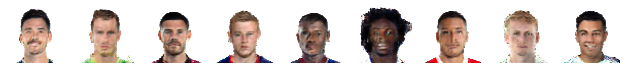

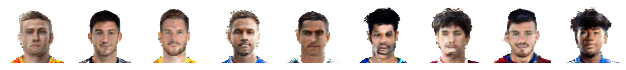

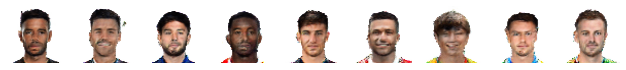

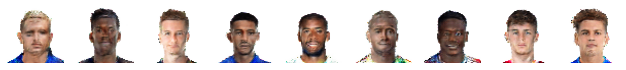

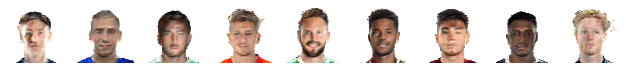

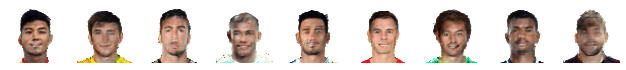

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_15/assets
Epoch:15, Step:0, D-Loss:0.530, D-Acc:72.000, G-Loss:1.111
Epoch:15, Step:50, D-Loss:0.553, D-Acc:74.000, G-Loss:1.381
Epoch:15, Step:100, D-Loss:0.554, D-Acc:70.000, G-Loss:0.951
Epoch:15, Step:150, D-Loss:0.674, D-Acc:59.000, G-Loss:1.254
Epoch:15, Step:200, D-Loss:0.566, D-Acc:71.000, G-Loss:1.489
Epoch:15, Step:250, D-Loss:0.631, D-Acc:60.000, G-Loss:1.667
Epoch:15, Step:300, D-Loss:0.544, D-Acc:74.000, G-Loss:1.629
Epoch:15, Step:350, D-Loss:0.492, D-Acc:73.000, G-Loss:0.840
Epoch:15, Step:400, D-Loss:0.811, D-Acc:48.000, G-Loss:0.760
Epoch:15, Step:450, D-Loss:0.408, D-Acc:86.000, G-Loss:1.029
Epoch:16, Step:0, D-Loss:0.568, D-Acc:69.000, G-Loss:1.571
Epoch:16, Step:50, D-Loss:0.423, D-Acc:78.000, G-Loss:1.113
Epoch:16, Step:100, D-Loss:0.648, D-Acc:62.000, G-Loss:1.118
Epoch:16, Step:150, D-Loss:0.493, D-Acc:76.000, G-Loss:1.313
Epoch:16, Step:200, D-Loss:0.506, D-Acc:73.000, G-Loss:1.9

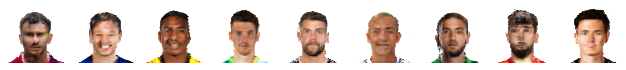

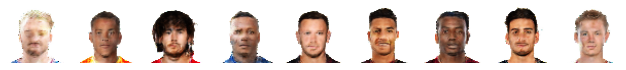

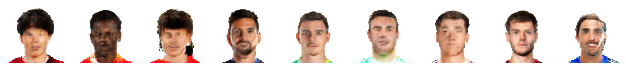

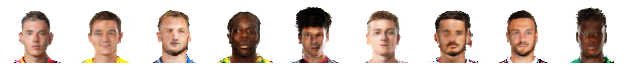

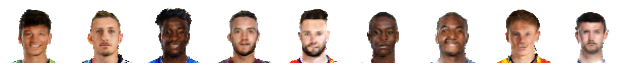

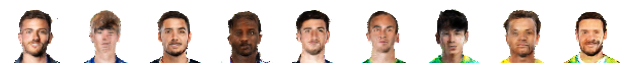

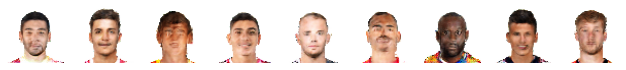

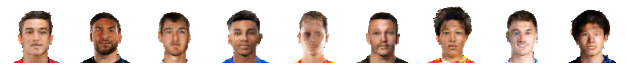

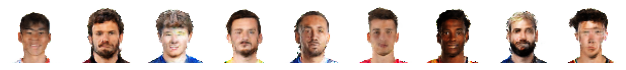

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_20/assets
Epoch:20, Step:0, D-Loss:0.780, D-Acc:58.000, G-Loss:1.471
Epoch:20, Step:50, D-Loss:0.458, D-Acc:81.000, G-Loss:1.216
Epoch:20, Step:100, D-Loss:0.494, D-Acc:78.000, G-Loss:1.489
Epoch:20, Step:150, D-Loss:0.563, D-Acc:67.000, G-Loss:1.210
Epoch:20, Step:200, D-Loss:0.693, D-Acc:57.000, G-Loss:1.182
Epoch:20, Step:250, D-Loss:0.391, D-Acc:87.000, G-Loss:1.506
Epoch:20, Step:300, D-Loss:0.517, D-Acc:74.000, G-Loss:1.378
Epoch:20, Step:350, D-Loss:0.613, D-Acc:67.000, G-Loss:0.642
Epoch:20, Step:400, D-Loss:0.480, D-Acc:79.000, G-Loss:0.393
Epoch:20, Step:450, D-Loss:0.554, D-Acc:71.000, G-Loss:1.405
Epoch:21, Step:0, D-Loss:0.581, D-Acc:65.000, G-Loss:0.880
Epoch:21, Step:50, D-Loss:0.548, D-Acc:77.000, G-Loss:0.758
Epoch:21, Step:100, D-Loss:0.609, D-Acc:65.000, G-Loss:0.670
Epoch:21, Step:150, D-Loss:0.590, D-Acc:70.000, G-Loss:1.415
Epoch:21, Step:200, D-Loss:0.499, D-Acc:76.000, G-Loss:1.5

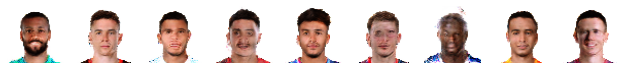

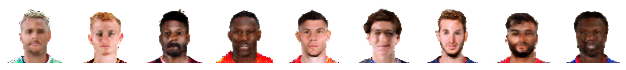

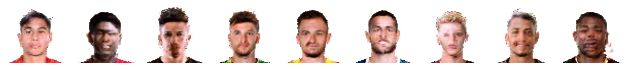

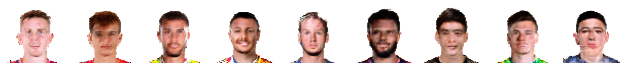

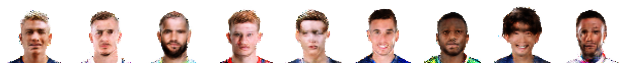

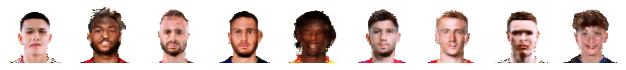

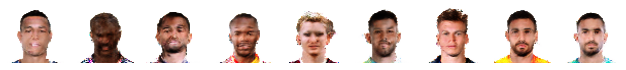

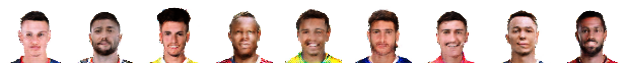

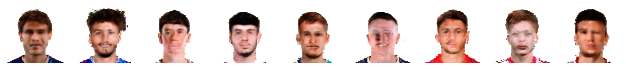

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_25/assets
Epoch:25, Step:0, D-Loss:0.445, D-Acc:78.000, G-Loss:1.705
Epoch:25, Step:50, D-Loss:0.463, D-Acc:80.000, G-Loss:0.406
Epoch:25, Step:100, D-Loss:0.587, D-Acc:67.000, G-Loss:1.053
Epoch:25, Step:150, D-Loss:0.618, D-Acc:64.000, G-Loss:1.394
Epoch:25, Step:200, D-Loss:0.547, D-Acc:73.000, G-Loss:1.681
Epoch:25, Step:250, D-Loss:0.672, D-Acc:66.000, G-Loss:1.300
Epoch:25, Step:300, D-Loss:0.483, D-Acc:81.000, G-Loss:1.775
Epoch:25, Step:350, D-Loss:0.273, D-Acc:89.000, G-Loss:2.230
Epoch:25, Step:400, D-Loss:0.395, D-Acc:86.000, G-Loss:1.989
Epoch:25, Step:450, D-Loss:0.484, D-Acc:78.000, G-Loss:1.186
Epoch:26, Step:0, D-Loss:0.524, D-Acc:80.000, G-Loss:1.164
Epoch:26, Step:50, D-Loss:0.608, D-Acc:69.000, G-Loss:1.632
Epoch:26, Step:100, D-Loss:0.610, D-Acc:71.000, G-Loss:1.274
Epoch:26, Step:150, D-Loss:0.573, D-Acc:70.000, G-Loss:0.629
Epoch:26, Step:200, D-Loss:0.749, D-Acc:53.000, G-Loss:0.8

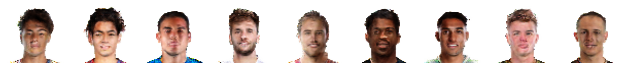

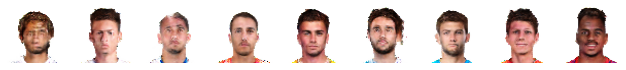

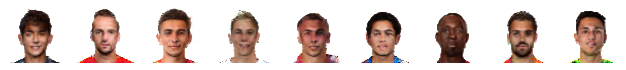

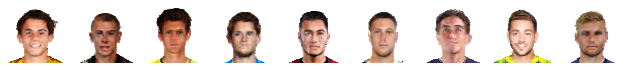

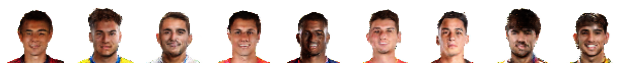

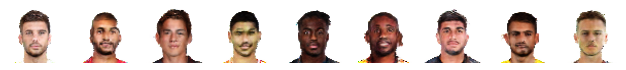

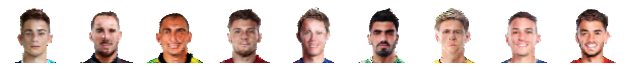

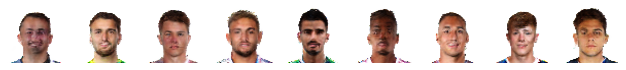

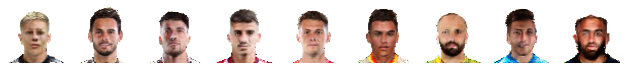

INFO:tensorflow:Assets written to: /content/gdrive/MyDrive/GAN_datasets/celeb_model_30/assets
Epoch:30, Step:0, D-Loss:0.359, D-Acc:87.000, G-Loss:1.745
Epoch:30, Step:50, D-Loss:0.546, D-Acc:71.000, G-Loss:2.462
Epoch:30, Step:100, D-Loss:0.445, D-Acc:78.000, G-Loss:1.850
Epoch:30, Step:150, D-Loss:0.595, D-Acc:65.000, G-Loss:1.082
Epoch:30, Step:200, D-Loss:0.367, D-Acc:88.000, G-Loss:1.224
Epoch:30, Step:250, D-Loss:0.597, D-Acc:66.000, G-Loss:1.414
Epoch:30, Step:300, D-Loss:0.413, D-Acc:84.000, G-Loss:1.671
Epoch:30, Step:350, D-Loss:0.503, D-Acc:74.000, G-Loss:1.664
Epoch:30, Step:400, D-Loss:0.417, D-Acc:83.000, G-Loss:1.449
Epoch:30, Step:450, D-Loss:0.469, D-Acc:81.000, G-Loss:1.405
Epoch:31, Step:0, D-Loss:0.394, D-Acc:84.000, G-Loss:1.380
Epoch:31, Step:50, D-Loss:0.395, D-Acc:82.000, G-Loss:1.859
Epoch:31, Step:100, D-Loss:0.622, D-Acc:69.000, G-Loss:0.981
Epoch:31, Step:150, D-Loss:0.452, D-Acc:77.000, G-Loss:1.338
Epoch:31, Step:200, D-Loss:0.500, D-Acc:77.000, G-Loss:0.3

In [ ]:
epochs = 200
batch_size = 100
steps = 500
noise_size = 100

for i in range(0, epochs):
    if (i%5 == 0):
        show_generator_results(generator_network)
        generator_network.save('/content/gdrive/MyDrive/GAN_datasets/celeb_model_'+ str(i))
    for j in range(steps):
        fake_samples = get_fake_samples(generator_network, batch_size//2, noise_size)
        real_samples = get_real_samples(batch_size=batch_size//2)

        fake_y = np.zeros((batch_size//2, 1))
        real_y = np.ones((batch_size//2, 1))
        
        input_batch = np.vstack((fake_samples, real_samples))
        output_labels = np.vstack((fake_y, real_y))
        # Updating Discriminator weights
        discriminator_network.trainable=True
        loss_d = discriminator_network.train_on_batch(input_batch, output_labels)
        
        gan_input = get_random_noise(batch_size, noise_size)
        
        # Make the Discriminator belive that these are real samples and calculate loss to train the generator
        gan_output = np.ones((batch_size))
        
        # Updating Generator weights
        discriminator_network.trainable=False
        loss_g = dcgan_model.train_on_batch(gan_input, gan_output)
        
        if j%50 == 0:
            print ("Epoch:%.0f, Step:%.0f, D-Loss:%.3f, D-Acc:%.3f, G-Loss:%.3f"%(i,j,loss_d[0],loss_d[1]*100,loss_g))
            

# Show Results

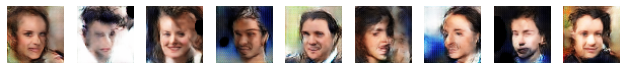

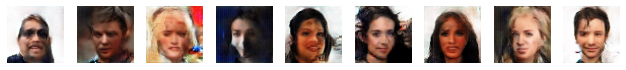

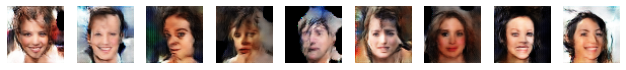

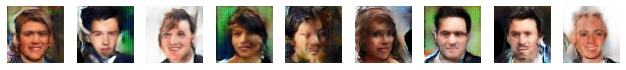

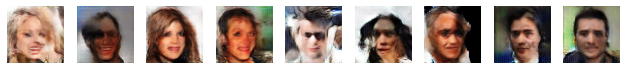

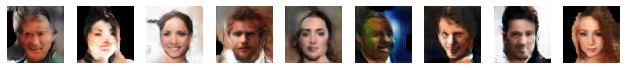

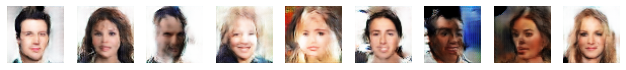

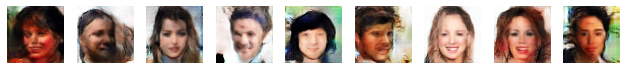

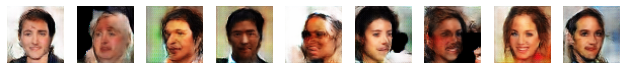

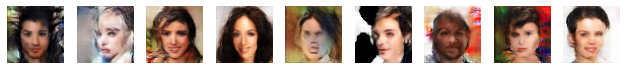

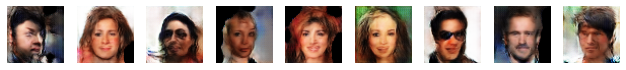

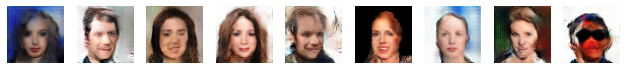

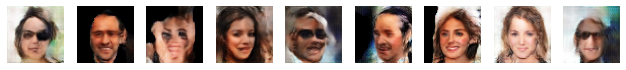

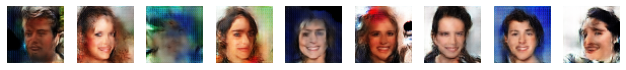

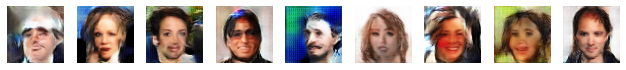

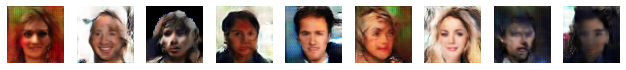

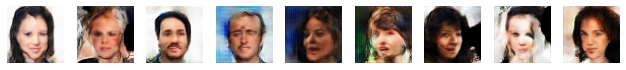

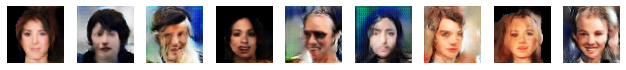

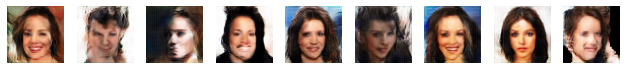

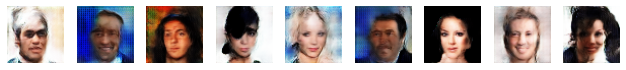

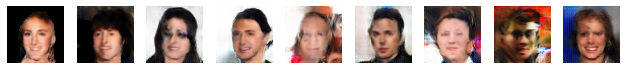

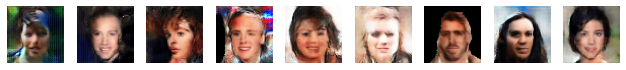

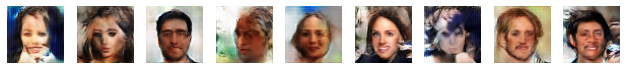

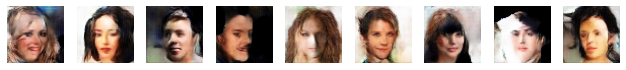

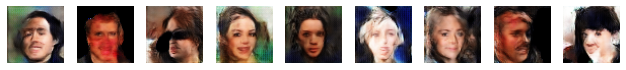

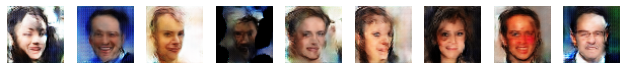

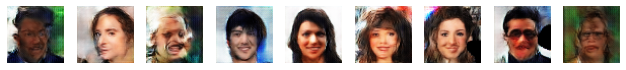

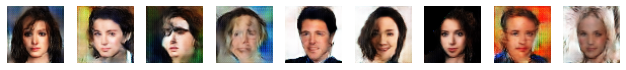

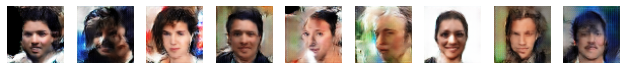

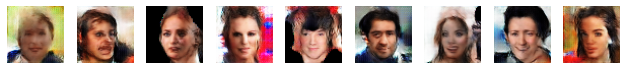

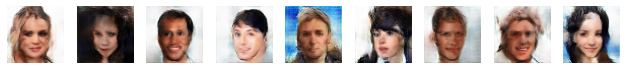

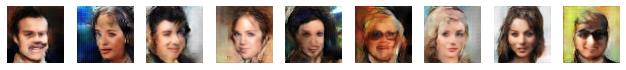

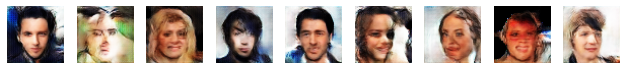

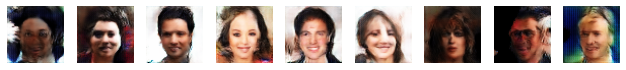

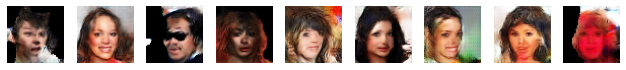

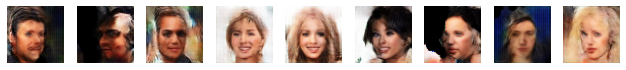

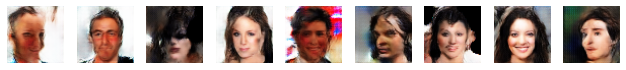

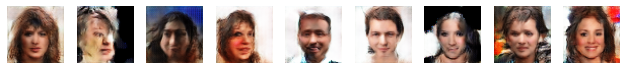

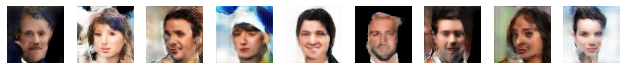

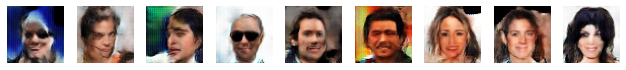

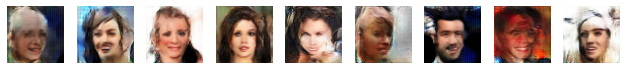

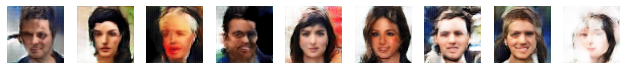

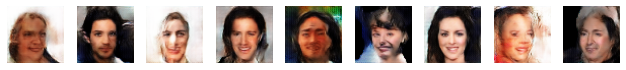

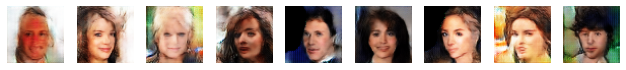

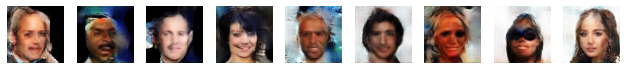

In [ ]:
#Generating Unlimited samples
noise_size=100
generator_network = tensorflow.keras.models.load_model('/content/gdrive/MyDrive/GAN_datasets/celeb_model_new')
for i in range(5):
    show_generator_results(generator_network)